In [1]:
# deep learning libraries
import torch

# other libraries
import os
import matplotlib.pyplot as plt

# own libraries
from src.utils import load_data, set_seed
from src.explain.saliency_maps import (
    SaliencyMap,
    PositiveSaliencyMap,
    NegativeSaliencyMap,
    ActiveSaliencyMap,
    InactiveSaliencyMap,
)
from src.explain.utils import format_image

# set all seeds and set number of threads
# set_seed(42)
torch.set_num_threads(8)


# set device
device: torch.device = (
    torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
)

In [2]:
# load model
model: torch.nn.Module = torch.load(f"models/mnist/cnn_pretrained_False.pt").to(device)
model.eval()

CNNModel(
  (cnn_net): Sequential(
    (0): Conv2d(1, 32, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (3): Block(
      (net): Sequential(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (3): ReLU()
        (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (5): ReLU()
      )
    )
    (4): Block(
      (net): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (3): ReLU()
        (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (5): ReLU()
      )
    )
    (5): Block(
      (net): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3

In [12]:
# load data
train_data, val_data = load_data("mnist", "data/mnist", batch_size=128, num_workers=4)

# get example
examples: torch.Tensor
examples, labels = next(iter(train_data))
examples = examples[labels == 0, :, :, :].to(device)

In [13]:
if not os.path.isdir("visualizations/selected_examples"):
    os.makedirs("visualizations/selected_examples")

In [14]:
index = 9

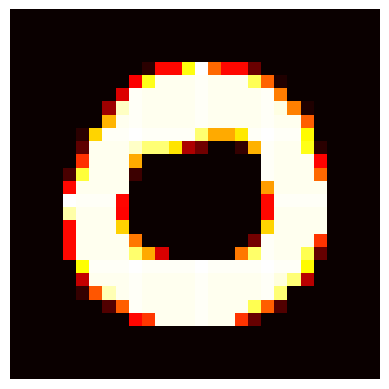

In [15]:
plt.axis("off")
plt.imshow(format_image(examples[0]), cmap="hot")
plt.savefig(
    f"visualizations/selected_examples/{index}.png",
    bbox_inches="tight",
    pad_inches=0,
    format="png",
    dpi=300,
)

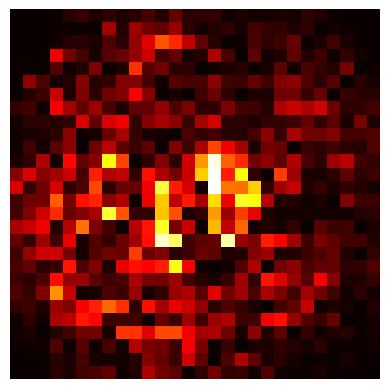

In [16]:
explainer = SaliencyMap(model)
saliency_maps = explainer.explain(examples)
plt.axis("off")
plt.imshow(saliency_maps[0].cpu().detach().numpy(), cmap="hot")
plt.savefig(
    f"visualizations/selected_examples/{index}_saliency_map.png",
    bbox_inches="tight",
    pad_inches=0,
    format="png",
    dpi=300,
)

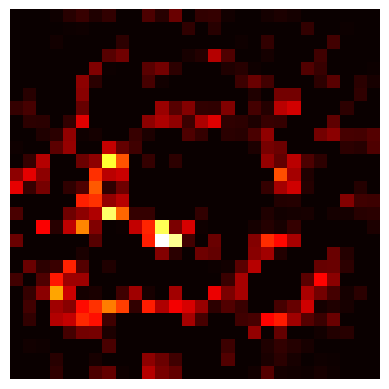

In [17]:
explainer = PositiveSaliencyMap(model)
saliency_maps = explainer.explain(examples)
plt.axis("off")
plt.imshow(saliency_maps[0].cpu().detach().numpy(), cmap="hot")
plt.savefig(
    f"visualizations/selected_examples/{index}_positive_saliency_map.png",
    bbox_inches="tight",
    pad_inches=0,
    format="png",
    dpi=300,
)

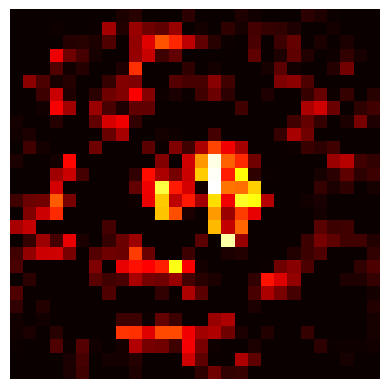

In [18]:
explainer = NegativeSaliencyMap(model)
saliency_maps = explainer.explain(examples)
plt.axis("off")
plt.imshow(saliency_maps[0].cpu().detach().numpy(), cmap="hot")
plt.savefig(
    f"visualizations/selected_examples/{index}_negative_saliency_map.png",
    bbox_inches="tight",
    pad_inches=0,
    format="png",
    dpi=300,
)

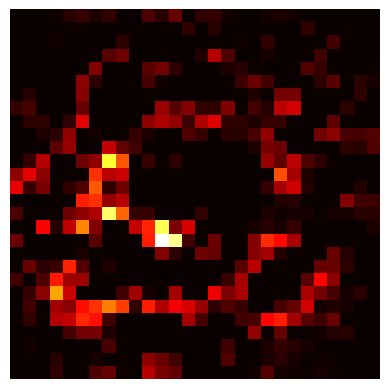

In [19]:
explainer = ActiveSaliencyMap(model)
saliency_maps = explainer.explain(examples)
plt.axis("off")
plt.imshow(saliency_maps[0].cpu().detach().numpy(), cmap="hot")
plt.savefig(
    f"visualizations/selected_examples/{index}_active_saliency_map.png",
    bbox_inches="tight",
    pad_inches=0,
    format="png",
    dpi=300,
)

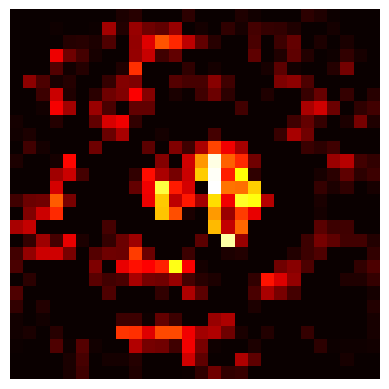

In [20]:
explainer = InactiveSaliencyMap(model)
saliency_maps = explainer.explain(examples)
plt.axis("off")
plt.imshow(saliency_maps[0].cpu().detach().numpy(), cmap="hot")
plt.savefig(
    f"visualizations/selected_examples/{index}_inactive_saliency_map.png",
    bbox_inches="tight",
    pad_inches=0,
    format="png",
    dpi=300,
)